In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy



white = (1.0, 1.0, 1.0)
red = (1.0, 0.0, 0.0)  
def plot_binary_matrix(matrix):
    # Create a custom colormap with colors for 0 and 1
    cmap_custom = plt.matplotlib.colors.ListedColormap(['white', 'red'])
    fig, ax = plt.subplots()
    plt.imshow(matrix, cmap=cmap_custom, interpolation='nearest')

    # Add gridlines
    if matrix.shape[0] <= 75:
        ax.set_xticks(np.arange(matrix.shape[1]) - 0.5, minor=True)
        ax.set_yticks(np.arange(matrix.shape[0]) - 0.5, minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)

    # Set labels
    plt.xlabel('Heap 1', fontsize = 14)
    plt.ylabel('Heap 2', fontsize = 14)
    
    # Adjust y-axis tick labels
    ax.invert_yaxis()
    plt.show()



In [2]:
def plot_four_binary_matrices(matrices):
    # Create a custom colormap with colors for 0 and 1
    cmap_custom = plt.matplotlib.colors.ListedColormap(['white', 'red'])
    
    # Create a figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust figsize as needed
    
    # Iterate over matrices and subplots
    for idx, matrix in enumerate(matrices):
        row_idx = idx // 2
        col_idx = idx % 2
        ax = axes[row_idx, col_idx]
        
        ax.imshow(matrix, cmap=cmap_custom, interpolation='nearest')

        # Add gridlines if matrix shape is less than 50x50
        if matrix.shape[0] < 75:
            ax.set_xticks(np.arange(matrix.shape[1]) - 0.5, minor=True)
            ax.set_yticks(np.arange(matrix.shape[0]) - 0.5, minor=True)
            ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)

        # Set labels
        ax.set_xlabel('Heap 1', fontsize=14)
        ax.set_ylabel('Heap 2', fontsize=14)
        
        # Adjust y-axis tick labels
        ax.invert_yaxis()
        
    plt.tight_layout()  # Adjust subplot layout
    plt.show()


In [3]:
def generate_moves_matrix(vectors, n):
    # Initialize a binary matrix filled with zeros
    matrix = np.ones((n+1, n+1), dtype=int)
    
    # Iterate through all possible heap sizes
    for heap1_size in range(n+1):
        for heap2_size in range(n+1):
            # Iterate through the given vectors to determine valid moves
            for vector in vectors:
                move1, move2 = vector
                new_heap1_size = heap1_size + move1
                new_heap2_size = heap2_size + move2
                
                # Check if the new heap sizes are within bounds
                if new_heap1_size >= 0 and new_heap2_size >= 0:
                    # Mark the corresponding position in the matrix as 1
                    matrix[heap1_size, heap2_size] = 0
    
    return matrix

def recursion(matrix, vectors, iters, n, winning):
    new_matrix = copy.deepcopy(matrix)
    if winning:
        for i in range(n + 1):
            for j in range(n + 1):
                p_position = True
                for vector in vectors:
                    move1, move2 = vector
                    new_posx = i + move1
                    new_posy = j + move2
                    if 0 <= new_posx <= n and 0 <= new_posy <= n: 
                        if new_matrix[new_posx][new_posy] == 1:
                            p_position = False
                if p_position:
                    matrix[i][j] = 1
    if not winning:
        for i in range(n + 1):
            for j in range(n + 1):
                p_position = True
                if new_matrix[i][j] == 1:
                    for vector in vectors:
                        move1, move2 = vector
                        new_posx = i + move1
                        new_posy = j + move2
                        if 0 <= new_posx <= n and 0 <= new_posy <= n: 
                            if new_matrix[new_posx][new_posy] == 1:
                                p_position = False
                    if not p_position:
                        matrix[i][j] = 0
        
    if iters == 0:
        return matrix
    else:
        if winning:
            winning = False
        else:
            winning = True
        return recursion(matrix, vectors, iters - 1, n, winning)


def two_heap_generator(size, vectors, give_matrix = False):
    n = size + 1
    result_matrix = generate_moves_matrix(vectors, n)
    result_matrix = recursion(result_matrix, vectors, 400, n, True)
    fin_matrix = np.rot90(result_matrix, k=1)
    inverted_matrix = np.flip(fin_matrix, axis=0)
    trimmed_matrix = inverted_matrix[:-1, :-1]
    if give_matrix:
        return trimmed_matrix
    else:
        plot_binary_matrix(trimmed_matrix)
    
def two_heap_generator_four(size, vectors1, vectors2, vectors3, vectors4):
    n = size + 1
    matrices = []
    
    for vectors in [vectors1, vectors2, vectors3, vectors4]:
        result_matrix = generate_moves_matrix(vectors, n)
        result_matrix = recursion(result_matrix, vectors, 400, n, True)
        fin_matrix = np.rot90(result_matrix, k=1)
        inverted_matrix = np.flip(fin_matrix, axis=0)
        trimmed_matrix = inverted_matrix[:-1, :-1]
        matrices.append(trimmed_matrix)
    
    plot_four_binary_matrices(matrices)
    


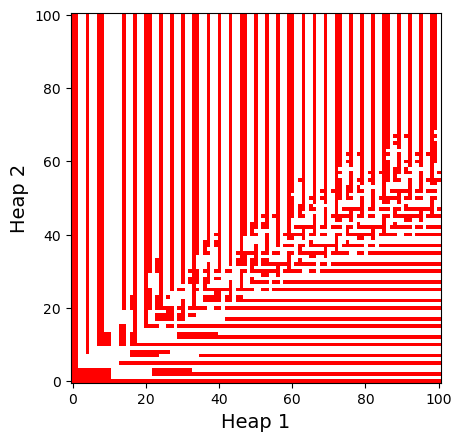

In [4]:
# Example usage:
vectors1 = [(-2, -4), (-5, -6), (-20,-22)]
vectors2 = [(-2, -4), (-5, -6), (-11, -1)]
vectors3 = [(-2, -4),(-5, -6),(-2, -2)]
vectors4 = [(-1, -3), (-2, -4), (-1, -3)]

SIZE = 100

two_heap_generator(SIZE, vectors2)

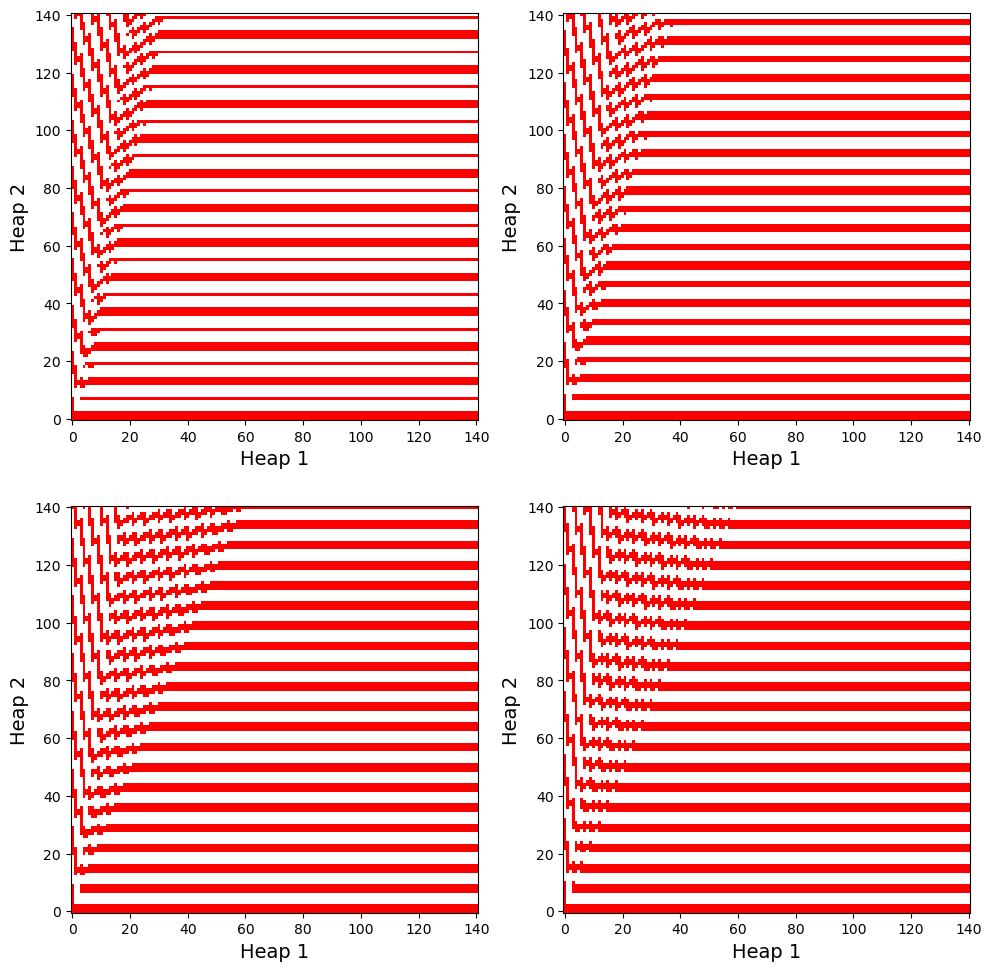

In [5]:
# Example usage:
vectors1 = [(-1, -3), (-2, -4), (-0, -8)]
vectors2 = [(-1, -3), (-2, -4), (-0, -9)]
vectors3 = [(-1, -3), (-2, -4), (-0, -10)]
vectors4 = [(-1, -3), (-2, -4), (-0, -11)]

SIZE = 140

two_heap_generator_four(SIZE, vectors1, vectors2, vectors3, vectors4)

In [6]:
def apply_coloring_scheme(matrix):
    """
    Apply the coloring scheme from Example 42 to the input matrix.
    """
    rows, cols = matrix.shape
    colored_matrix = matrix.copy()

    # Initial coloring
    colored_matrix[0, 0] = 2  # Red
    colored_matrix[1, 0] = 2  # Red
    colored_matrix[2, 0] = 2  # Red
    colored_matrix[3, 0] = 2  # Red
    colored_matrix[4, 0] = 2  # Red
    colored_matrix[0, 1] = 3  # Green
    colored_matrix[1, 1] = 3  # Green
    colored_matrix[2, 1] = 3  # Green
    colored_matrix[3, 1] = 3  # Green
    colored_matrix[3, 2] = 4  # Blue

    # Update rules
    for row in range(rows):
        for col in range(cols):
            if colored_matrix[row, col] == 2:  # Red
                new_row, new_col = row + 9, col + 8
                if new_row < rows and new_col < cols:
                    colored_matrix[new_row, new_col] = 3  # Green

            elif colored_matrix[row, col] == 3:  # Green
                new_row1, new_col1 = row + 10, col + 6
                new_row2, new_col2 = row + 9, col + 8
                if new_row1 < rows and new_col1 < cols:
                    colored_matrix[new_row1, new_col1] = 2  # Red
                if new_row2 < rows and new_col2 < cols:
                    colored_matrix[new_row2, new_col2] = 4  # Blue

            elif colored_matrix[row, col] == 4:  # Blue
                new_row, new_col = row + 9, col + 8
                if new_row < rows and new_col < cols:
                    colored_matrix[new_row, new_col] = 4  # Blue

    return colored_matrix

def plot_matrix(matrix, title):
    """
    Plot the matrix with different colors for different values.
    """
    # Define a custom colormap with colors for different values
    cmap_custom = plt.matplotlib.colors.ListedColormap(['white', 'grey', 'red', 'green', 'blue'])

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.imshow(matrix, cmap=cmap_custom, interpolation='nearest')

    # Add gridlines
    if matrix.shape[0] <= 75:
        ax.set_xticks(np.arange(matrix.shape[1]) - 0.5, minor=True)
        ax.set_yticks(np.arange(matrix.shape[0]) - 0.5, minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)

    # Set labels
    plt.xlabel('Heap 1', fontsize=14)
    plt.ylabel('Heap 2', fontsize=14)

    # Adjust y-axis tick labels
    ax.invert_yaxis()

    # Add diagonal lines
    max_value_x = matrix.shape[1]  # Maximum x-dimension of the matrix
    max_value_y = matrix.shape[0]  # Maximum y-dimension of the matrix

    # Example diagonal lines: y = 0.5x, y = 2x
    slopes = [1.125, 1.429]
    y_ints = [-19/8, 0.142]

    for m in range(len(slopes)):
        x_vals = []
        y_vals = []
        for x in range(max_value_x):
            y = slopes[m] * x + y_ints[m]
            if -1 < y and y < max_value_y-0.5:
                x_vals.append(x)
                y_vals.append(y)
            elif y > 0:
                break

        ax.plot(x_vals, y_vals, 'k', linewidth=2)  # 'k--' is black dashed line


    plt.show()

In [7]:
def apply_coloring_scheme(matrix):
    """
    Apply the coloring scheme from Example 42 to the input matrix.
    """
    rows, cols = matrix.shape
    colored_matrix = matrix.copy()

    # Initial coloring
    colored_matrix[0, 0] = 2  # Red
    colored_matrix[0, 1] = 2  # Red
    colored_matrix[0, 2] = 2  # Red
    colored_matrix[1, 2] = 2  # Red
    colored_matrix[2, 2] = 2  # Red
    colored_matrix[3, 2] = 2  # Red

    # Update rules
    for row in range(rows):
        for col in range(cols):
            if colored_matrix[row, col] == 2:  # Red
                new_row1, new_col1 = row + 9, col + 8
                if new_row1 < rows and new_col1 < cols:
                    colored_matrix[new_row1, new_col1] = 4  # Green
                new_row2, new_col2 = row + 10, col + 7
                if new_row2 < rows and new_col2 < cols:
                    colored_matrix[new_row2, new_col2] = 2  # Green


            elif colored_matrix[row, col] == 4:  # Blue
                new_row, new_col = row + 9, col + 8
                if new_row < rows and new_col < cols:
                    colored_matrix[new_row, new_col] = 4  # Blue
                    


    return colored_matrix

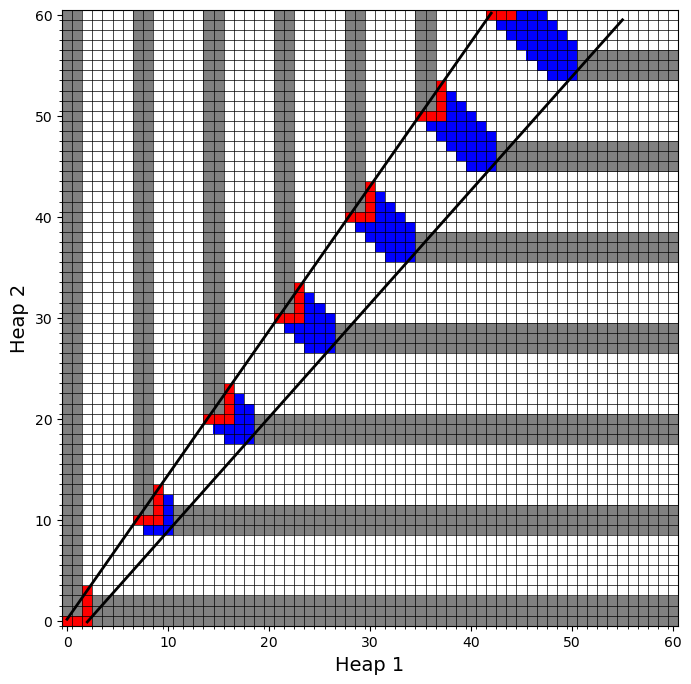

In [8]:
SIZE = 60
vectors1 = [(-3, -3), (-2, -4), (-5,-6)]
vectors3 = [(-1, -2),(-2, -3),(-3, -1)]
mtrx = two_heap_generator(SIZE, vectors1, True)

colored_matrix = apply_coloring_scheme(mtrx)
plot_matrix(colored_matrix, "Colored Matrix")